# Лабораторная работа  6

Линейная Регрессия в sklearn

Выполнил: 6133, Борисов Д.С.

Ссылки на теорию: 
- https://habr.com/ru/company/ods/blog/323890/
- https://habr.com/ru/post/278513/
- https://habr.com/ru/post/279117/

## 0 Найти и загрузить датасет, подходящий для задачи регрессии. 

Набор данных должен содержать не только числовые, но и категориальные/бинарные признаки. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

## Star dataset to predict star types

A 6 class star dataset for star classification with Deep Learned approaches.

**Dataset Info:**

This is a dataset consisting of several features of stars.

Some of them are:

* __Integer__: Absolute Temperature **(in K)** - This column consists of the Surface temperatures of several stars
* __Real__: Relative Luminosity **(L/Lo)** - This column consists of the Luminosity of several stars calculated with respect to sun(L/Lo)
* __Real__: Relative Radius **(R/Ro)** - This column consists of the Radius of several stars calculated with respect to sun(R/Ro)
* __Real__: Absolute Magnitude **(Mv)** - This column consists of the Absolute Visual magnitude(Mv) of several stars
* __Categorical__: Star Color **(white,Red,Blue,Yellow,yellow-orange etc)** - This column contains the info about the colors of each star after Spectral Analysis
* __Categorical__: Spectral Class **(O,B,A,F,G,K,M)** - This column contains info about the spectral classes of each star(O,B,A,F,G,K,M) 
* __Categorical__: Star Type **(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)** - This column is the output class (6 classes ranging from 0-5) 0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

Загрузка датасета

In [1]:
from pandas import read_csv

In [2]:
dataset = read_csv('../data/Star_dataset.csv')
dataset

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,blue,O
236,30839,834042.000000,1194.0000,-10.63,5,blue,O
237,8829,537493.000000,1423.0000,-10.73,5,white,A
238,9235,404940.000000,1112.0000,-11.23,5,white,A


## 1 Временно удалить категориальные / бинарные признаки, оставив только вещественные (потом вернёмся к ним позже).

In [3]:
labels = dataset['Star type']
cut_dataset = dataset.drop(columns=['Star color', 'Spectral Class'])
cut_dataset.shape

(240, 5)

## 2 Визуализировать heatmap-матрицу кореллированности признаков. См. [пример.](https://stackoverflow.com/questions/39409866/correlation-heatmap)

In [4]:
from seaborn import heatmap

<AxesSubplot:>

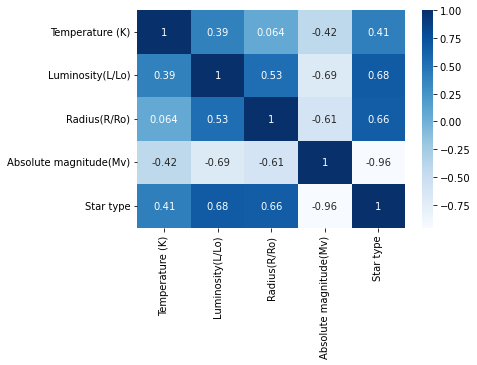

In [5]:
corr = cut_dataset.corr()
heatmap(corr, cmap="Blues", annot=True)

## 3 Визуализировать взаимосвязь между целевой переменной и каждым признаком 
(с помощью srs.pairplot или pandas.plotting.scatter_matrix или как-то ещё). Лучше всего, если будете строить диаграмму попарного распределения не между ВСЕМИ парами признаков, а только между признаками и целевой переменной. См. [пример.](https://stackoverflow.com/questions/31966494/compare-1-independent-vs-many-dependent-variables-using-seaborn-pairplot-in-an-h)


In [6]:
from seaborn import pairplot

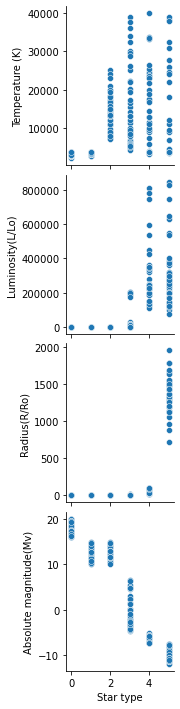

In [7]:
pairplot(data=cut_dataset, x_vars='Star type', y_vars=cut_dataset.columns.drop('Star type'))

## 4  Разделить набор данных на обучающую и тестовую выборки

Удаление целевой переменной из датасета

In [8]:
cut_data = cut_dataset.drop(columns='Star type')

Разбиение данных на обучающие и тестовые с долей тестовых данных 0.3

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cut_data, labels, test_size=0.3, random_state=123)

In [11]:
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((168, 4), (72, 4), (168,), (72,))

## **5 Линейная регрессия**

5.1 Обучить модель линейной регрессии (`LinearRegression`)

5.2 Вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

5.3 Вывести `model.coef_` и `model.intercept_`

5.4 Построить график (barh) с важностью коэфициентов при соответствующих признаках (строится точно так же, как мы строили графики для feature_importance в теме с деревьями). Желательно, чтобы сверху вниз шли коэффициенты по убыванию, а названия соответствующих признаков подписаны по вертикальной оси. 

Обучение модели `LinearRegression`

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lr_model = LinearRegression()
lr_model.fit(Xtrain, Ytrain)

LinearRegression()

Общая функция оценки классификации для модели, высчитывающая `MAE, MSE, R2, model.coef_ и model.intercept_`, а также строящая **barh** с важностью коэффициентов при соответствующих признаках 

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pandas import DataFrame

In [15]:
def common_report(model, Xtrain, Xtest, Ytrain, Ytest, get_info=False):
    
    train_pred = model.predict(Xtrain)
    test_pred = model.predict(Xtest)

    print(f'Отчёт по классификации моделью {model}:')

    train_mae = mean_absolute_error(Ytrain, train_pred)
    train_mse = mean_squared_error(Ytrain, train_pred)
    train_r2 = r2_score(Ytrain, train_pred)
    test_mae = mean_absolute_error(Ytest, test_pred)
    test_mse = mean_squared_error(Ytest, test_pred)
    test_r2 = r2_score(Ytest, test_pred)
    
    print('------------- Метрики -------------')
    print(f'train MAE: {train_mae}\n test MAE: {test_mae}')
    print(f'train MSE: {train_mse}\n test MSE: {test_mse}')
    print(f'train R2: {train_r2}\n test R2: {test_r2}')

    print('------------- Атрибуты -------------')
    coef = DataFrame(data=model.coef_, index=Xtrain.columns, columns=['Features'])
    coef.sort_values(by='Features', ascending=False, inplace=True)

    print(f'model.coef_:\n{coef}\n')
    print(f'model.intercept_: {model.intercept_}')

    coef.plot.barh(align='center')

    # Датафрейм с основными данными
    info = DataFrame({'model':[model, model], 
                    'MAE':[train_mae, test_mae], 
                    'MSE':[train_mse, test_mse], 
                    'R2':[train_r2, test_r2]}, index=['Train', 'Test'])

    return info if get_info else None

Отчёт по классификации моделью LinearRegression():
------------- Метрики -------------
train MAE: 0.3426826595000748
 test MAE: 0.43507194380690173
train MSE: 0.19724036910982992
 test MSE: 0.28502050517986155
train R2: 0.9334101414144038
 test R2: 0.8979595097477623
------------- Атрибуты -------------
model.coef_:
                            Features
Radius(R/Ro)            3.927153e-04
Temperature (K)         5.400837e-06
Luminosity(L/Lo)       -8.822212e-08
Absolute magnitude(Mv) -1.434524e-01

model.intercept_: 2.9571203995655173


,model,MAE,MSE,R2
Train,LinearRegression(),0.342683,0.197240,0.93341
Test,LinearRegression(),0.435072,0.285021,0.89796


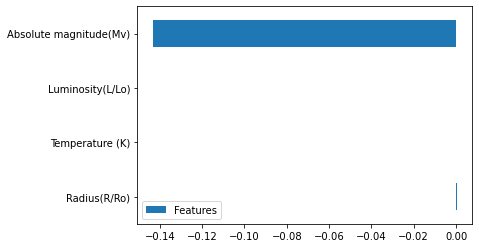

In [16]:
lr_report = common_report(lr_model, Xtrain, Xtest, Ytrain, Ytest, get_info=True)
lr_report

## **6 Модель `Lasso`**

6.1 Обучить модель регрессии (`Lasso`), с помощью `GridSearchCV` подобрать параметр alpha, дальше работаем с лучшей моделью

6.1 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

6.3 Для лучшей модели вывести `model.coef_` и `model.intercept_`

6.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках



In [17]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from numpy import linspace
from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
lasso_model = GridSearchCV(Lasso(), param_grid={'alpha': linspace(0, 5, 51)}, cv=5)
lasso_model.fit(Xtrain, Ytrain)
lasso_model = lasso_model.best_estimator_
lasso_model

Lasso(alpha=0.1)

Отчёт по классификации моделью Lasso(alpha=0.1):
------------- Метрики -------------
train MAE: 0.3457427722936276
 test MAE: 0.43400971441109826
train MSE: 0.1974661955877612
 test MSE: 0.2823676785831329
train R2: 0.9333339006666391
 test R2: 0.8989092509823922
------------- Атрибуты -------------
model.coef_:
                            Features
Radius(R/Ro)            4.080827e-04
Temperature (K)         5.909386e-06
Luminosity(L/Lo)       -2.910674e-08
Absolute magnitude(Mv) -1.411782e-01

model.intercept_: 2.9325755162424305


,model,MAE,MSE,R2
Train,Lasso(alpha=0.1),0.345743,0.197466,0.933334
Test,Lasso(alpha=0.1),0.434010,0.282368,0.898909


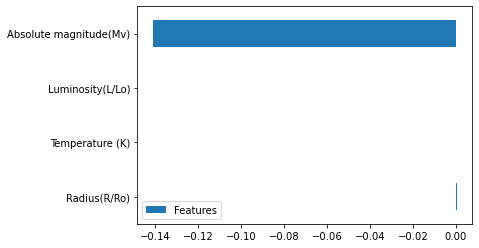

In [19]:
lasso_report = common_report(lasso_model, Xtrain, Xtest, Ytrain, Ytest, get_info=True)
lasso_report

## **7 Модель Ridge**

7.1 Обучить модель регрессии (`Ridge`), с помощью `GridSearchCV`  подобрать параметр alpha, дальше работаем с лучшей моделью

7.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

7.3 Для лучшей модели вывести model.coef_ и model.intercept_

7.4  Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [20]:
from sklearn.linear_model import Ridge

In [21]:
ridge_model = GridSearchCV(Ridge(), param_grid={'alpha': linspace(0, 100, 101)}, cv=5)
ridge_model.fit(Xtrain, Ytrain)
ridge_model = ridge_model.best_estimator_
ridge_model

Ridge(alpha=82.0)

Отчёт по классификации моделью Ridge(alpha=82.0):
------------- Метрики -------------
train MAE: 0.3447439005651124
 test MAE: 0.4343054794469883
train MSE: 0.19735020086606903
 test MSE: 0.28310347354359067
train R2: 0.9333730613726803
 test R2: 0.8986458282562173
------------- Атрибуты -------------
model.coef_:
                            Features
Radius(R/Ro)            4.038010e-04
Temperature (K)         5.759304e-06
Luminosity(L/Lo)       -4.769034e-08
Absolute magnitude(Mv) -1.418662e-01

model.intercept_: 2.939948498725188


,model,MAE,MSE,R2
Train,Ridge(alpha=82.0),0.344744,0.197350,0.933373
Test,Ridge(alpha=82.0),0.434305,0.283103,0.898646


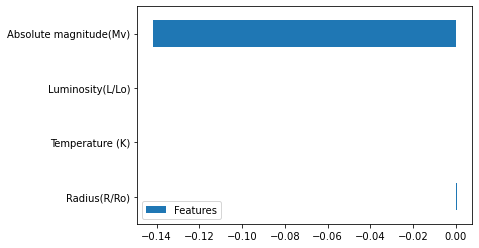

In [22]:
ridge_report = common_report(ridge_model, Xtrain, Xtest, Ytrain, Ytest, get_info=True)
ridge_report

## **8 Модель `ElasticNet`**

8.1 Обучить модель регрессии (ElasticNet), с помощью GridSearchCV подобрать параметры alpha и l1_ratio (в пределах 0:1), дальше работаем с лучшей моделью

8.2 Для лучшей модели вывести метрики MAE, MSE и R2 на обущающем и тестовом наборе

8.3 Для лучшей модели вывести model.coef_ и model.intercept_

8.4 Для лучшей модели построить график (barh) с важностью коэфициентов при соответствующих признаках

In [23]:
from sklearn.linear_model import ElasticNet

In [24]:
en_model = GridSearchCV(ElasticNet(), param_grid={'alpha': linspace(0, 10, 101), 'l1_ratio': linspace(0, 1, 21)}, cv=5)
en_model.fit(Xtrain, Ytrain)
en_model = en_model.best_estimator_
en_model

ElasticNet(alpha=0.6000000000000001, l1_ratio=0.0)

Отчёт по классификации моделью ElasticNet(alpha=0.6000000000000001, l1_ratio=0.0):
------------- Метрики -------------
train MAE: 0.3452772993547532
 test MAE: 0.4341321368523869
train MSE: 0.19740549759426138
 test MSE: 0.28269999928301615
train R2: 0.9333543927739183
 test R2: 0.898790276499782
------------- Атрибуты -------------
model.coef_:
                            Features
Radius(R/Ro)            4.063081e-04
Temperature (K)         5.840375e-06
Luminosity(L/Lo)       -3.852366e-08
Absolute magnitude(Mv) -1.415075e-01

model.intercept_: 2.93606490840982


,model,MAE,MSE,R2
Train,"ElasticNet(alpha=0.6000000000000001, l1_ratio=...",0.345277,0.197405,0.933354
Test,"ElasticNet(alpha=0.6000000000000001, l1_ratio=...",0.434132,0.282700,0.898790


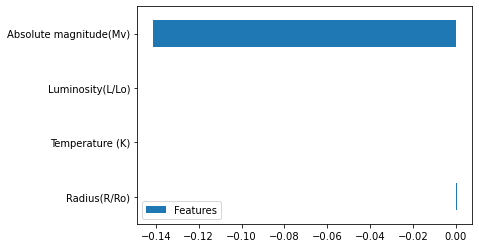

In [25]:
en_report = common_report(en_model, Xtrain, Xtest, Ytrain, Ytest, get_info=True)
en_report

## 9 Выбрать лучшую модель, указать значения MAE, MSE и R2 на тестовом наборе

Построение датафреймов со значениями MAE, MSE, R2

In [26]:
MAE, MSE, R2 = {}, {}, {}
for report in [lr_report, lasso_report, ridge_report, en_report]:
    MAE[report.at['Test', 'model']] = report.at['Test', 'MAE']
    MSE[report.at['Test', 'model']] = report.at['Test', 'MSE']
    R2[report.at['Test', 'model']] = report.at['Test', 'R2']
MAE = DataFrame(MAE, index=['MAE (desc)']).T.sort_values('MAE (desc)', ascending=True)
MSE = DataFrame(MSE, index=['MSE (desc)']).T.sort_values('MSE (desc)', ascending=True)
R2 = DataFrame(R2, index=['R2 (asc)']).T.sort_values('R2 (asc)', ascending=False)

MAE, MSE, R2

(                                                    MAE (desc)
 Lasso(alpha=0.1)                                      0.434010
 ElasticNet(alpha=0.6000000000000001, l1_ratio=0.0)    0.434132
 Ridge(alpha=82.0)                                     0.434305
 LinearRegression()                                    0.435072,
                                                     MSE (desc)
 Lasso(alpha=0.1)                                      0.282368
 ElasticNet(alpha=0.6000000000000001, l1_ratio=0.0)    0.282700
 Ridge(alpha=82.0)                                     0.283103
 LinearRegression()                                    0.285021,
                                                     R2 (asc)
 Lasso(alpha=0.1)                                    0.898909
 ElasticNet(alpha=0.6000000000000001, l1_ratio=0.0)  0.898790
 Ridge(alpha=82.0)                                   0.898646
 LinearRegression()                                  0.897960)

**Лучшей моделью оказалась модель `Lasso(alpha=0.1)`**

## 10  Возвращаем категориальные / бинарные признаки на место в датасет, 
категориальные признаки преобразуем в набор бинарных через `pd.get_dummies( ..., drop_first = True )`. Обучаем лучшую модель.

In [27]:
from pandas import get_dummies

In [28]:
dummy_dataset = get_dummies(dataset, drop_first=True)
dummy_dataset.drop(columns='Star type', inplace=True)

In [29]:
dum_Xtrain, dum_Xtest, dum_Ytrain, dum_Ytest = train_test_split(dummy_dataset, labels, test_size=0.3, random_state=123)

In [30]:
best_model = Lasso().set_params(**lasso_report.at['Test', 'model'].get_params())
best_model.fit(dum_Xtrain, dum_Ytrain)

Lasso(alpha=0.1)

## 11 Как изменились метрики MAE и MSE на тестовом наборе, вывести их и сделать выводы

Отчёт по классификации моделью Lasso(alpha=0.1):
------------- Метрики -------------
train MAE: 0.34574292666432355
 test MAE: 0.434009541009364
train MSE: 0.19746620573596696
 test MSE: 0.28236750342903244
train R2: 0.9333338972405272
 test R2: 0.8989093136894956
------------- Атрибуты -------------
model.coef_:
                                   Features
Radius(R/Ro)                   4.080849e-04
Temperature (K)                5.909450e-06
Star color_whitish             0.000000e+00
Spectral Class_M              -0.000000e+00
Spectral Class_K               0.000000e+00
Spectral Class_G               0.000000e+00
Spectral Class_F               0.000000e+00
Spectral Class_B               0.000000e+00
Star color_yellowish-white     0.000000e+00
Star color_yellowish           0.000000e+00
Star color_yellow-white        0.000000e+00
Star color_white-yellow        0.000000e+00
Star color_white               0.000000e+00
Star color_red                -0.000000e+00
Star color_pale-yellow-or

,model,MAE,MSE,R2
Train,Lasso(alpha=0.1),0.345743,0.197466,0.933334
Test,Lasso(alpha=0.1),0.434010,0.282368,0.898909


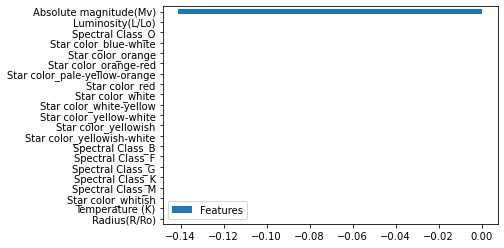

In [31]:
best_model_report = common_report(best_model, dum_Xtrain, dum_Xtest, dum_Ytrain, dum_Ytest, get_info=True)
best_model_report

Вычитаем у модели **без dummy признаков** значения MAE, MSE, R2 модели **с dummy признаками** 

In [32]:
best_model_report.loc['Test', 'MAE':] - lasso_report.loc['Test', 'MAE':]

MAE   -0.0
MSE   -0.0
R2     0.0
Name: Test, dtype: object

**Для моего датасета использование бинарных признаков не дало никаких результатов**

## 12 Прогоняем датасет, который уже обогащён бинарными признаками, через StandardScaler, 
обучаем найденную на предыдущих шагах лучшую модель. Как изменились MAE, MSE и R2 на тестовом наборе, вывести метрики и сделать выводы. 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaled_dataset = StandardScaler().fit_transform(dummy_dataset)
scaled_dataset = DataFrame(data=scaled_dataset, columns=dummy_dataset.columns, index=dummy_dataset.index)

In [35]:
sc_Xtrain, sc_Xtest, sc_Ytrain, sc_Ytest = train_test_split(scaled_dataset, labels, test_size=0.3, random_state=123)

In [36]:
best_scaled_model = Lasso().set_params(**lasso_report.at['Test', 'model'].get_params())
best_scaled_model.fit(sc_Xtrain, sc_Ytrain)

Lasso(alpha=0.1)

## 13 Построить график (barh) с важностью коэфициентов при соответствующих признаках для задания 12

Отчёт по классификации моделью Lasso(alpha=0.1):
------------- Метрики -------------
train MAE: 0.31970280750284
 test MAE: 0.40087698375009295
train MSE: 0.14874280849221264
 test MSE: 0.20997077464545144
train R2: 0.9497832891521027
 test R2: 0.9248281425578715
------------- Атрибуты -------------
model.coef_:
                               Features
Radius(R/Ro)                   0.196401
Spectral Class_F               0.032020
Temperature (K)               -0.000000
Star color_whitish             0.000000
Spectral Class_K               0.000000
Spectral Class_G               0.000000
Spectral Class_B               0.000000
Star color_yellowish-white     0.000000
Star color_yellowish           0.000000
Star color_yellow-white        0.000000
Star color_white-yellow       -0.000000
Luminosity(L/Lo)               0.000000
Star color_white               0.000000
Star color_pale-yellow-orange  0.000000
Star color_orange-red          0.000000
Star color_orange              0.000000
Star c

,model,MAE,MSE,R2
Train,Lasso(alpha=0.1),0.319703,0.148743,0.949783
Test,Lasso(alpha=0.1),0.400877,0.209971,0.924828


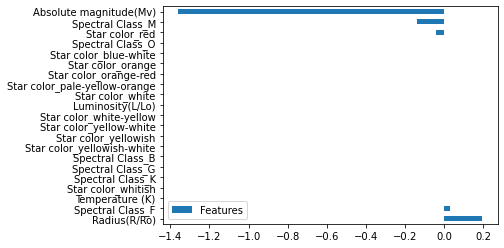

In [37]:
best_scaled_model_report = common_report(best_scaled_model, sc_Xtrain, sc_Xtest, sc_Ytrain, sc_Ytest, get_info=True)
best_scaled_model_report

In [38]:
best_model_report.loc['Test', 'MAE':] - best_scaled_model_report.loc['Test', 'MAE':]

MAE    0.033133
MSE    0.072397
R2    -0.025919
Name: Test, dtype: object

**Использование `StandartScaler` дало положительный результат**

**Замечания:** При использовании GridSearchCV для извлечения параметров лучшей модели используем атрибут с объектом лучшей модели: gs.best_estimator_, например извлекаем вектор коэффициентов: gs.best_estimator_.coef_

Логика всего задания проста:

- Ищем лучший регрессор на вещественных признаках

- Пробуем добавить категориальные (преобразованные в бинарные), смотрим как изменилось качество, стала ли модель лучше работать

- Нормализуем признаки через StandardScaler, смотрим, повлияло ли это на качество модели.

## Заключение

* Для моего датасета наилучшим регрессором оказался `Lasso` с гиперпараметров alpha=0.1
* Использование бинарных признаков не дало никаких результатов
* Нормализация `StandartScaler` улучшила показатели модели